In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split

In [16]:
xls = pd.ExcelFile('/Users/asheshlalshrestha/Desktop/UB/Research/Hospital prediction/CarePathways-main/Models/Datasets/PhyAdRsnComorbMed.xlsx')
df1 = pd.read_excel(xls, 'Hospital-length-of-stay')
df3 = pd.read_excel(xls, 'Data-at-admission')

### Dataset for the length of stay

In [17]:
df1

,id,parent_id,did_the_patient_expire_in_hospital,reason_for_death,days_in_hospital_prior_to_expiration,hospital_length_of_stay,icu_length_of_stay,days_in_hospital_prior_to_icu_admission,time_on_mechanical_ventilation,days_in_hospital_prior_to_mechanical_ventilation,days_to_first_covid19_test_negative
0,1,1,Yes,Hospital acquired Pneumonia,20.0,21,NaN,NaN,NaN,NaN,NaN
1,2,2,No,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
2,3,3,No,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
3,4,4,Yes,COVID-19 Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN
4,5,5,Yes,COVID-Pneumonia,9.0,9,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
503,516,517,Yes,NaN,19.0,19,6.0,13.0,5.0,15.0,NaN
504,518,519,No,NaN,NaN,9,NaN,NaN,0.0,NaN,NaN
505,520,521,No,NaN,NaN,7,NaN,NaN,0.0,NaN,NaN
506,521,522,No,NaN,NaN,5,NaN,NaN,0.0,NaN,NaN


### Dataset for data at admission

In [4]:
df3

,id,age,sex,height,weight,smoking_history,year_they_quit,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,Rybelsus,Prozac Capsules,Methylprednisolone Acetate Injectable Suspension Usp
0,1,74,1,NaN,NaN,NaN,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2,61,0,154.9,73.6,NaN,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,3,58,0,NaN,NaN,NaN,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,4,94,1,182.8,66.2,NaN,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,5,91,1,NaN,NaN,1.0,NaN,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,516,74,0,NaN,55.0,NaN,0.0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN
504,517,81,1,158.0,65.0,NaN,NaN,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
505,519,74,1,NaN,81.7,NaN,0.0,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
506,521,48,0,180.0,95.3,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Matching the hospital length of stay with the data at admission

In [5]:
df3['hospital_length_of_stay'] = df1['hospital_length_of_stay']

### Dropping the id as it is not necessary

In [6]:
df3 = df3.drop('id',axis=1)

In [7]:
df3

,age,sex,height,weight,smoking_history,year_they_quit,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,Rybelsus,Prozac Capsules,Methylprednisolone Acetate Injectable Suspension Usp,hospital_length_of_stay
0,74,1,NaN,NaN,NaN,NaN,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,21
1,61,0,154.9,73.6,NaN,NaN,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,5
2,58,0,NaN,NaN,NaN,NaN,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,7
3,94,1,182.8,66.2,NaN,NaN,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,9
4,91,1,NaN,NaN,1.0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,74,0,NaN,55.0,NaN,0.0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19
504,81,1,158.0,65.0,NaN,NaN,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,9
505,74,1,NaN,81.7,NaN,0.0,1,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,7
506,48,0,180.0,95.3,NaN,NaN,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


### Thus df3 becomes our final dataset on which we will be preprocessing and making the model
#### Counting the null values
We can see that there are null values in 
1. height
2. weight
3. smoking_history
4. year_they_quit
5. Rest of the morbid conditions

In [8]:
df3.isnull().sum().reset_index(name='counts').sort_values(by='counts',ascending=False)

,index,counts
746,Rybelsus,508
748,Methylprednisolone Acetate Injectable Suspensi...,508
747,Prozac Capsules,508
4,smoking_history,430
5,year_they_quit,247
...,...,...
34,reason_for_admission_Cough [R05],0
33,reason_for_admission_Coronavirus infection [B3...,0
32,reason_for_admission_COVID-19 with multiple co...,0
31,reason_for_admission_COVID-19 virus infection ...,0


## Data cleaning

#### We will handle the null values in height and weight with the mean values and the null values in smoking history will be handled by entering 0 as 1 means they have a history

In [9]:
df3['height'] = df3['height'].fillna(df3['height'].mean())
df3['weight'] = df3['weight'].fillna(df3['weight'].mean())
df3['smoking_history']=df3['smoking_history'].fillna(0)

### We are droping year_they_quit as they have no significance and rest of the tables as they have no values for the 508 rows

In [10]:
df3 = df3.drop(['year_they_quit','Methylprednisolone Acetate Injectable Suspension Usp','Prozac Capsules','Rybelsus'],axis=1)

### Dropped the null rows as only Elavil had 2 rows that had null values

In [11]:
df3 = df3.dropna()

### Now we can see that there are no null values

In [12]:
a = df3.isnull().sum().reset_index(name='Null counts')
a

,index,Null counts
0,age,0
1,sex,0
2,height,0
3,weight,0
4,smoking_history,0
...,...,...
741,Glucosamine,0
742,Turmeric,0
743,Cogentin Tab,0
744,Elavil,0


In [13]:
df3

,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),Diabetes,...,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,hospital_length_of_stay
0,74,1,166.911029,80.265922,0.0,0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
1,61,0,154.900000,73.600000,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,58,0,166.911029,80.265922,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,94,1,182.800000,66.200000,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,91,1,166.911029,80.265922,1.0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,68,0,164.000000,77.100000,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
502,56,0,165.000000,72.600000,0.0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13
503,74,0,166.911029,55.000000,0.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19
504,81,1,158.000000,65.000000,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


### Standarizing the dataset where we will only standarize the three columns:
1. age
2. height
3. weight

In [14]:
columns_to_standardize = ['age', 'height', 'weight']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns using the scaler
df3[columns_to_standardize] = scaler.fit_transform(df3[columns_to_standardize])

### Scaled dataset

In [15]:
df3

,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),Diabetes,...,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,hospital_length_of_stay
0,0.485152,1,0.003233,0.001623,0.0,0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
1,-0.308119,0,-1.497964,-0.362476,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,-0.491182,0,0.003233,0.001623,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,1.705571,1,1.989114,-0.766671,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,1.522508,1,0.003233,0.001623,1.0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.119027,0,-0.360602,-0.171303,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
502,-0.613224,0,-0.235617,-0.417097,0.0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13
503,0.485152,0,0.003233,-1.378426,0.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19
504,0.912299,1,-1.110511,-0.832216,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [16]:
# df3.to_csv("preprocessed_dataset.csv")

### Splitting train and test dataset
1. y is the Target variable which is the 'hospital_length_of_stay'
2. X will be everything except the target variable

In [16]:
from sklearn.model_selection import train_test_split

X = df3.drop('hospital_length_of_stay', axis =1)

y = df3.hospital_length_of_stay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Testing for the principal component ananlysis

In [17]:
 # Create PCA object forming 10 PCs
pca = PCA(n_components = 15)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape)                                      

[[-0.46285071 -0.80303111  0.24250362 ... -0.17453688 -0.30529053
   0.15174391]
 [-0.9975716   1.1140011   0.5891324  ... -0.13648189 -0.11123472
   0.09846208]
 [ 0.22524502  0.47810389 -0.08194291 ...  0.35340437  0.06371219
   0.47890706]
 ...
 [-1.03783024  0.30983397 -1.04257953 ... -0.58036186 -0.03586865
  -0.41079309]
 [-1.63111708  0.02813336  0.09989589 ... -0.17520475  0.57273974
  -0.37121266]
 [-0.18036953 -0.36818808  0.12110347 ...  0.09965806  0.30993465
  -0.45556805]]
(506, 15)


In [18]:
## total pca numbers initially
PC_number = np.arange(pca.n_components_) + 1 
print(PC_number)                                                        

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [19]:
#tract proportion of explained variance
var = pca.explained_variance_ 
# we will get 10 value of explained variance
print(var)                                                   

[1.71946211 0.97357941 0.64675984 0.34811147 0.3428537  0.21916568
 0.20575205 0.18448239 0.1777925  0.16739056 0.14885556 0.14012145
 0.1357591  0.12516626 0.12367731]


### Plotting the graph for explained variance vs the number of components

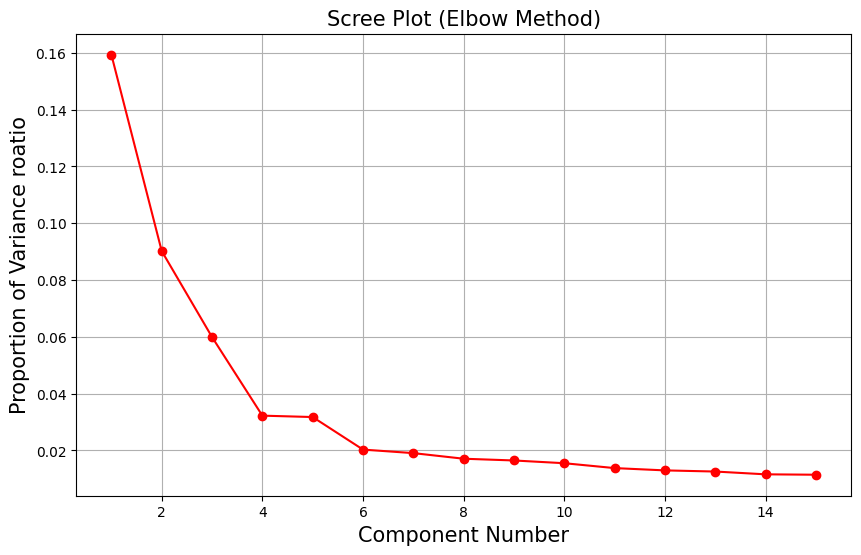

In [20]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))                          
plt.plot(PC_number,                                  
         explained_variance_ratios,
         'ro-')
plt.title('Scree Plot (Elbow Method)',       
          fontsize = 15)
plt.xlabel('Component Number',
           fontsize = 15)
plt.ylabel('Proportion of Variance roatio',
           fontsize = 15)
plt.grid()                                                       
plt.show()                                                    

In [21]:
explained_variance_ratios

array([0.15934127, 0.09022088, 0.05993475, 0.03225923, 0.031772  ,
       0.02030992, 0.01906689, 0.01709585, 0.0164759 , 0.01551196,
       0.01379433, 0.01298495, 0.01258069, 0.01159906, 0.01146108])

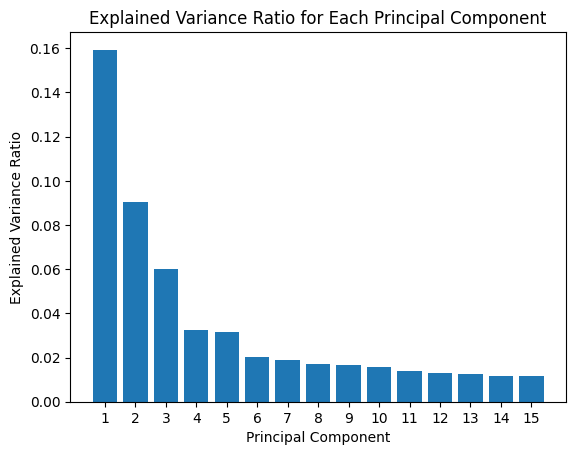

In [22]:
# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

### Creating a model, initially for lasso regression

In [23]:
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model using the training data
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 176.3511644220652


### Getting the importance of the features that is defined by the coeffecients distributed by lasso regression

In [24]:
# Get feature importances from coefficients
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': abs(lasso.coef_)}).sort_values(by='Importance', ascending=False)

feature_importances 

,Feature,Importance
481,Quetiapine,13.375551
346,Ergocalciferol,9.560524
202,Lantus Solostar,9.061820
44,reason_for_admission_Respiratory distress [R06.0],5.395518
288,Diovan,4.293876
...,...,...
267,Fosrenol,0.000000
268,Sensipar,0.000000
269,Replavite,0.000000
270,Glumetza,0.000000


### Important features are those which have importance of more than 0

In [25]:
# Print feature importances
important_features = feature_importances[feature_importances['Importance']>0]
important_features

,Feature,Importance
481,Quetiapine,13.375551
346,Ergocalciferol,9.560524
202,Lantus Solostar,9.061820
44,reason_for_admission_Respiratory distress [R06.0],5.395518
288,Diovan,4.293876
359,Ventolin,3.925890
83,Metformin,3.638737
14,Asthma,3.295421
6,admission_disposition,2.710344
127,Escitalopram,2.575687


### Dropping the unimportant features from X

In [26]:
feature_array = important_features['Feature'].values

cols_to_drop = [col for col in X.columns if col not in feature_array]

new_x_for_lasso = X.drop(cols_to_drop,axis=1)

### Our new_x_for_lasso will have features that do have only 37 columns

In [27]:
new_x_for_lasso

,age,sex,height,smoking_history,previous_er_visit_within_14_days,admission_disposition,Diabetes,Kidney disease,Asthma,reason_for_admission_Fever [R50.9],...,Lantus Solostar,Prednisone,Lantus,Ventolin Hfa,Diovan,Ergocalciferol,Ventolin,Janumet Xr,Phenylephrine Hydrochloride,Quetiapine
0,0.485152,1,0.003233,0.0,0,1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.308119,0,-1.497964,0.0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.491182,0,0.003233,0.0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.705571,1,1.989114,0.0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.522508,1,0.003233,1.0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.119027,0,-0.360602,0.0,1,1,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,-0.613224,0,-0.235617,0.0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.485152,0,0.003233,0.0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,0.912299,1,-1.110511,0.0,1,1,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting the new df 
we can see that we are getting the same mse with lesser number of features

In [28]:
X_train, X_test, y_train, y_test = train_test_split(new_x_for_lasso, y, test_size=0.3, random_state=42)

# Train the model using the training data
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 176.350846768892


### Again conducting pca in the new df

In [29]:
# Ideal Number of Components
pca = PCA(n_components = 15)                      # Create PCA object forming 10 PCs
pca_trans = pca.fit_transform(new_x_for_lasso)     # Transform data
print(pca_trans)                                                  # Print transformed data
print(pca_trans.shape)                                      # Print dimensions of transformed data

[[ 0.2898412  -0.48800713  0.60442308 ...  0.29826245  0.30215381
  -0.26234561]
 [ 0.98452275  1.30832973 -0.31309777 ... -0.09090766 -0.07236492
  -0.0569537 ]
 [-0.22521687  0.51622502 -0.35281288 ... -0.10663305 -0.04661925
  -0.02758858]
 ...
 [ 0.35908812 -0.17715741 -0.64656355 ...  0.57204591 -0.52117117
   0.23229649]
 [ 1.32453486 -0.07415938  0.37868327 ... -0.13711508 -0.21812943
  -0.07881522]
 [ 0.17303238 -0.35211704 -0.51719265 ... -0.26505764 -0.05733981
  -0.16295055]]
(506, 15)


Explained Variance Ratios for each component:
Component 1: 0.3183496434399411
Component 2: 0.2207941644825011
Component 3: 0.06182775505891361
Component 4: 0.048360994240558654
Component 5: 0.0423242234955493
Component 6: 0.03067685791224855
Component 7: 0.028188782028108324
Component 8: 0.026484190901184687
Component 9: 0.020174577295937083
Component 10: 0.01944935310466282
Component 11: 0.017632909696816843
Component 12: 0.014723840659464206
Component 13: 0.012360739778716316
Component 14: 0.011814481199400421
Component 15: 0.010794862537664117


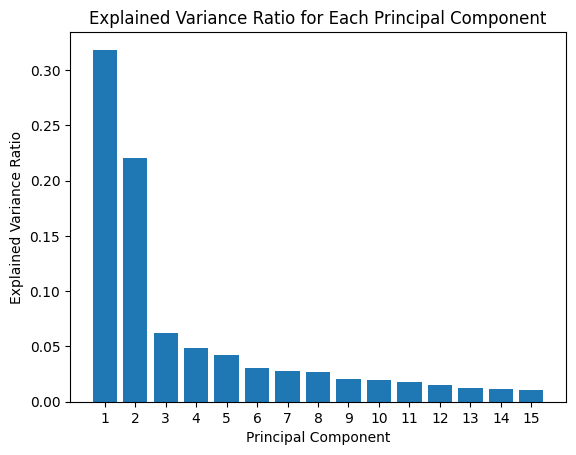

In [30]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
print("Explained Variance Ratios for each component:")
for i, var_ratio in enumerate(explained_variance_ratios):
    print(f"Component {i+1}: {var_ratio}")

# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

### Fitting the reduced dimension values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

In [32]:
# Train the model using the training data
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 172.09000404871222


### Hyperparameter tuning for lasso

In [33]:
lasso = Lasso()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]} 

# Perform grid search using cross-validation (CV)
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Use the best hyperparameters to fit the model
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_lasso.predict(X_train))
mse_test = mean_squared_error(y_test, best_lasso.predict(X_test))

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Best Alpha: 1
Train MSE: 129.1460946726675
Test MSE: 172.09000404871222


### We will deep dive into classificaion modeling
1. We will see the stats in the target variable which is hospital length of stay
2. We can see that the mean is 12 days

In [34]:
df4 = df3
df4

,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),Diabetes,...,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,hospital_length_of_stay
0,0.485152,1,0.003233,0.001623,0.0,0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
1,-0.308119,0,-1.497964,-0.362476,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,-0.491182,0,0.003233,0.001623,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,1.705571,1,1.989114,-0.766671,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,1.522508,1,0.003233,0.001623,1.0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.119027,0,-0.360602,-0.171303,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
502,-0.613224,0,-0.235617,-0.417097,0.0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13
503,0.485152,0,0.003233,-1.378426,0.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19
504,0.912299,1,-1.110511,-0.832216,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [35]:
df4['hospital_length_of_stay'].describe()

count    506.000000
mean      12.454545
std       11.920318
min        1.000000
25%        5.000000
50%        8.000000
75%       15.000000
max       81.000000
Name: hospital_length_of_stay, dtype: float64

### Anything above 12 days will be 1 and anything below will be 0
Which means that 1 is a long stay and 0 is a short stay

In [36]:
df4['hospital_length_of_stay'] = df4['hospital_length_of_stay'].apply(lambda x: 1 if x > 12 else 0)

In [37]:
df4['hospital_length_of_stay'].value_counts()

hospital_length_of_stay
0    350
1    156
Name: count, dtype: int64

### Initally we will use the logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df4.drop('hospital_length_of_stay',axis=1)
y= df4['hospital_length_of_stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.6381578947368421


### Conducting PCA

In [39]:
 # Create PCA object forming 10 PCs
pca = PCA(n_components = 15)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape)                       

[[-0.46285071 -0.80303112  0.24250356 ... -0.16897674 -0.3019652
   0.15894309]
 [-0.9975716   1.1140011   0.5891324  ... -0.13448907 -0.11430767
   0.09975204]
 [ 0.22524502  0.47810389 -0.08194291 ...  0.35342077  0.0622698
   0.47752711]
 ...
 [-1.03783024  0.30983397 -1.04257954 ... -0.5806332  -0.02654587
  -0.40641744]
 [-1.63111708  0.02813336  0.09989589 ... -0.1816563   0.58837078
  -0.37362948]
 [-0.18036953 -0.36818808  0.1211035  ...  0.10020636  0.32199664
  -0.44380621]]
(506, 15)


Explained Variance Ratios for each component:
Component 1: 0.15934127038553844
Component 2: 0.09022087791899432
Component 3: 0.05993475204193772
Component 4: 0.03225923042024367
Component 5: 0.03177199700111332
Component 6: 0.020309921209850056
Component 7: 0.019066887869717573
Component 8: 0.017095839674830804
Component 9: 0.016475898971923263
Component 10: 0.015511973055860996
Component 11: 0.01379418863903127
Component 12: 0.012984510171821182
Component 13: 0.012581324057390637
Component 14: 0.011600380077751436
Component 15: 0.011462277694567214


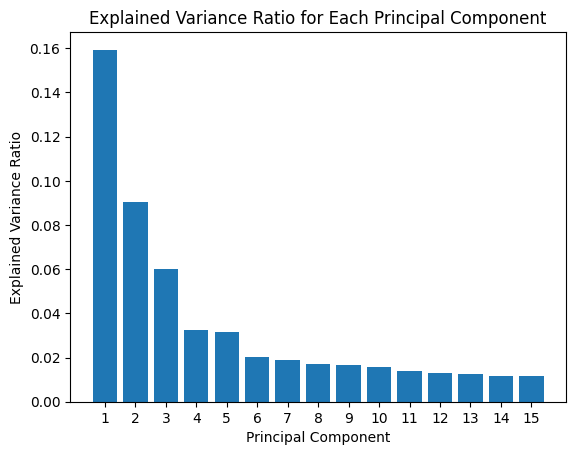

In [40]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
print("Explained Variance Ratios for each component:")
for i, var_ratio in enumerate(explained_variance_ratios):
    print(f"Component {i+1}: {var_ratio}")

# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

In [42]:
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.6447368421052632


### Feature importance

In [43]:
X = df4.drop('hospital_length_of_stay',axis=1)
y= df4['hospital_length_of_stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Get the coefficients (importance) of each feature
coefficients = model.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance_df

,Feature,Coefficient
0,age,-0.069229
1,sex,-0.153855
2,height,-0.086031
3,weight,-0.081030
4,smoking_history,0.075316
...,...,...
740,Desvenlafaxine,0.000000
741,Glucosamine,-0.163476
742,Turmeric,0.000000
743,Cogentin Tab,0.524659


### Important features

In [44]:
# Print feature importances
important_features = feature_importance_df[feature_importance_df['Coefficient']!=0].sort_values(by='Coefficient',ascending=False)
important_features

,Feature,Coefficient
481,Quetiapine,1.435209
177,Vitamin B Complex Tab,0.946738
372,Tylenol Arthritis Pain H,0.936260
174,Multivitamins,0.935241
202,Lantus Solostar,0.919974
...,...,...
91,Gliclazide,-0.770846
6,admission_disposition,-0.801416
14,Asthma,-0.808137
130,Eliquis,-0.896044


### Removing unimportant features

In [45]:
feature_array = important_features['Feature'].values

cols_to_drop = [col for col in X.columns if col not in feature_array]

new_x_for_logistic = X.drop(cols_to_drop,axis=1)

### New X for logistic regression

In [46]:
new_x_for_logistic

,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),Diabetes,...,Ipratropium Bromide,Salbutamol Hfa,Muscle &Amp; Back Pain Relief Caplets,Xultophy,Respiractin,Zaxine,Quinine Sulfate,Glucosamine,Cogentin Tab,Elavil
0,0.485152,1,0.003233,0.001623,0.0,0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.308119,0,-1.497964,-0.362476,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.491182,0,0.003233,0.001623,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.705571,1,1.989114,-0.766671,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.522508,1,0.003233,0.001623,1.0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.119027,0,-0.360602,-0.171303,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
502,-0.613224,0,-0.235617,-0.417097,0.0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
503,0.485152,0,0.003233,-1.378426,0.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
504,0.912299,1,-1.110511,-0.832216,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(new_x_for_logistic, y, test_size=0.3, random_state=42)
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.6381578947368421


### Conducting PCA on the new X

In [48]:
# Ideal Number of Components
pca = PCA(n_components = 15)                      
pca_trans = pca.fit_transform(new_x_for_logistic)     
print(pca_trans)                                                 
print(pca_trans.shape)                                  

[[-0.4630038  -0.8035353   0.24284425 ... -0.16974819 -0.30200778
   0.19357502]
 [-0.99789584  1.11424865  0.5892987  ... -0.13390682 -0.10428521
   0.11745609]
 [ 0.22516598  0.47825754 -0.08189607 ...  0.35879699  0.108344
   0.4690189 ]
 ...
 [-1.03806171  0.30953841 -1.04296053 ... -0.58769287 -0.07147688
  -0.39709789]
 [-1.63146678  0.02769581  0.09969821 ... -0.19168269  0.54780282
  -0.42238789]
 [-0.18044421 -0.36860544  0.12114955 ...  0.08825746  0.26774135
  -0.47849626]]
(506, 15)


Explained Variance Ratios for each component:
Component 1: 0.16391334055565865
Component 2: 0.09277968664027803
Component 3: 0.06162744258150165
Component 4: 0.03313138368089231
Component 5: 0.03263289847604402
Component 6: 0.020831940968320764
Component 7: 0.019566788400252538
Component 8: 0.017530474290474326
Component 9: 0.016894253719040724
Component 10: 0.015889674334176044
Component 11: 0.014134053570503858
Component 12: 0.013288140102919475
Component 13: 0.012884373954199417
Component 14: 0.011880767017063334
Component 15: 0.011715342786697905


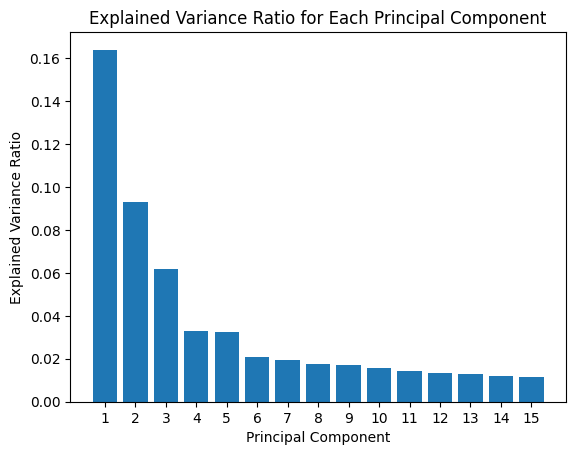

In [49]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
print("Explained Variance Ratios for each component:")
for i, var_ratio in enumerate(explained_variance_ratios):
    print(f"Component {i+1}: {var_ratio}")

# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

In [50]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.6447368421052632


### Calculating the feature importance

In [64]:
df4

,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),Diabetes,...,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,hospital_length_of_stay
0,0.485152,1,0.003233,0.001623,0.0,0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-0.308119,0,-1.497964,-0.362476,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.491182,0,0.003233,0.001623,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.705571,1,1.989114,-0.766671,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.522508,1,0.003233,0.001623,1.0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.119027,0,-0.360602,-0.171303,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
502,-0.613224,0,-0.235617,-0.417097,0.0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
503,0.485152,0,0.003233,-1.378426,0.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
504,0.912299,1,-1.110511,-0.832216,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [75]:
X = df4.drop('hospital_length_of_stay',axis=1)
y= df4['hospital_length_of_stay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

f_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get the indices of features sorted by importance
sorted_indices = np.argsort(feature_importances)[::-1]

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance',ascending=False)

feature_importances

array([6.81856179e-02, 1.53876232e-02, 5.56579842e-02, 5.35379828e-02,
       1.32160731e-02, 7.63178056e-03, 1.55705658e-02, 2.17543433e-02,
       4.06735542e-03, 1.70673053e-02, 1.43813031e-03, 1.88078925e-02,
       3.39570622e-03, 3.25906681e-03, 9.57836289e-03, 0.00000000e+00,
       2.41149817e-03, 1.45417692e-03, 9.17873020e-04, 1.46552038e-04,
       1.85025374e-03, 0.00000000e+00, 3.11739836e-03, 3.15717879e-03,
       1.03827336e-03, 0.00000000e+00, 0.00000000e+00, 3.54764393e-04,
       1.41328910e-02, 0.00000000e+00, 3.54737855e-06, 4.50947798e-03,
       0.00000000e+00, 0.00000000e+00, 1.79549604e-03, 3.58779447e-03,
       0.00000000e+00, 1.21534215e-04, 7.43065720e-03, 0.00000000e+00,
       3.18616220e-03, 1.51387412e-02, 6.97559657e-04, 1.08895505e-02,
       3.39325072e-03, 0.00000000e+00, 0.00000000e+00, 7.81711131e-03,
       0.00000000e+00, 4.07462987e-03, 0.00000000e+00, 2.73781557e-03,
       2.27549090e-03, 1.92916639e-03, 4.53910078e-03, 9.09073293e-03,
      

In [67]:
sorted_indices

array([  0,   2,   3,   7,  11,  83,   9,   6,   1,  41,  28, 423,   4,
       481, 359,  43, 202, 189,  14,  55, 434,  47,   5,  38, 133, 463,
       537, 372, 177, 234,  59, 743, 615, 163, 643, 170, 408, 685, 527,
       119,  58, 254, 186, 354,  70,  54,  31, 446, 253,  75, 336, 370,
        62, 135, 313,  84, 104, 211, 274,  49,   8, 555, 618, 188, 625,
        80, 174, 697, 330, 171,  35, 158, 126, 497, 403, 465, 319,  12,
        44, 694,  13, 232,  85,  40,  23, 192,  22, 337, 149, 388,  68,
       208, 303, 460, 470, 288,  63, 543, 571, 276, 206, 175, 349,  51,
       346, 355, 233, 402,  97, 148, 691, 228,  96,  16, 106, 553,  52,
       552, 194, 198,  74, 452, 201, 695, 185, 316, 118, 124, 302,  69,
       145, 210, 392,  67,  79,  53, 363, 550, 131, 178, 718,  20, 236,
       365, 227, 574, 305,  34, 356, 541, 252, 542, 150, 377, 623, 517,
       453,  93, 246, 526, 476, 101, 324, 184, 641, 733, 268, 296, 229,
       290, 374, 350, 616, 157, 122, 200,  17, 217,  10, 475, 28

### Using random forest classifier on the original dataset

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5986842105263158


### Using rf on the PCA reduced dataset

In [52]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.6447368421052632


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.25352697368421057


In [54]:
r2_score(y_test,y_pred)

-0.10685699168556329

In [55]:
## how to handle the missing value such as missing year for smoking
## how to handle should we reduce the dimension of the rows as there are 747 columns
## are we using logistic regression to predict a classified dependent variable if yes then how are we to classifiy

In [56]:
rf_regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [57]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [58]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Best Model: RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=150,
                      random_state=42)


In [59]:
y_pred = best_model.predict(X_test)

# Calculate and print Mean Squared Error (MSE) using the best model
mse = mean_squared_error(y_test, y_pred)

In [60]:
mse

0.24702518519359704

In [61]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

# Generate sample data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestRegressor and hyperparameter distributions
rf_regressor = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=100,
                                   cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate and print Mean Squared Error (MSE) using the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) with Best Model:", mse)


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}
Mean Squared Error (MSE) with Best Model: 2565.649842419421


In [62]:
c_space = np.logspace(-5, 8, 15)

In [63]:
c_space

array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])